In [ ]:
import tensorflow as tf
import numpy as np

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

def preprocess_image(image):
    # 28x28 이미지를 192x4로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros((192, 4), dtype=int)

    for i in range(192):
        for j in range(4):
            pixel_value = flattened[i * 4 + j]
            reshaped[i, j] = 1 if pixel_value >= 0.5 else 0

    return reshaped

# 변환된 이미지를 저장할 리스트
preprocessed_images = [preprocess_image(img) for img in x_train]

# 변환된 데이터 확인
print(preprocessed_images[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 0]
 [1 1 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 1]
 [1 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0

In [ ]:
len(preprocessed_images)

60000

In [ ]:
print(preprocessed_images)

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import numpy as np
import os
import zipfile

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4bit 조합을 숫자로 매핑하는 딕셔너리
bit_to_num = {
    '0000': 0, '0001': 1, '0010': 2, '0100': 3,
    '1000': 4, '0011': 5, '0101': 6, '1001': 7,
    '0110': 8, '1010': 9, '1100': 10, '0111': 11,
    '1011': 12, '1101': 13, '1110': 14, '1111': 15
}

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=int)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def save_and_zip_images(images, folder_name, zip_filename):
    # 폴더 생성
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # 변환된 이미지를 저장하고 TXT로 내보내기
    for idx, img in enumerate(images):
        processed_image = preprocess_image(img)
        file_path = os.path.join(folder_name, f'mnist_image_{idx}.txt')
        with open(file_path, 'w') as f:
            f.write(' '.join(map(str, processed_image)))

    # ZIP 파일 생성
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for root, _, files in os.walk(folder_name):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_name))

# Train set 저장 및 압축
save_and_zip_images(x_train, 'mnist_train_txt', 'mnist_train_txt_files.zip')

# Test set 저장 및 압축
save_and_zip_images(x_test, 'mnist_test_txt', 'mnist_test_txt_files.zip')

print('ZIP 파일이 생성되었습니다: mnist_train_txt_files.zip, mnist_test_txt_files.zip')


ZIP 파일이 생성되었습니다: mnist_train_txt_files.zip, mnist_test_txt_files.zip


Distribution of 4-bit Values in MNIST Train Set Counts:
0: 8839510
1: 355230
2: 24047
3: 23115
4: 364531
5: 356294
6: 806
7: 11919
8: 105069
9: 959
10: 346862
11: 276826
12: 8580
13: 9044
14: 262331
15: 534877


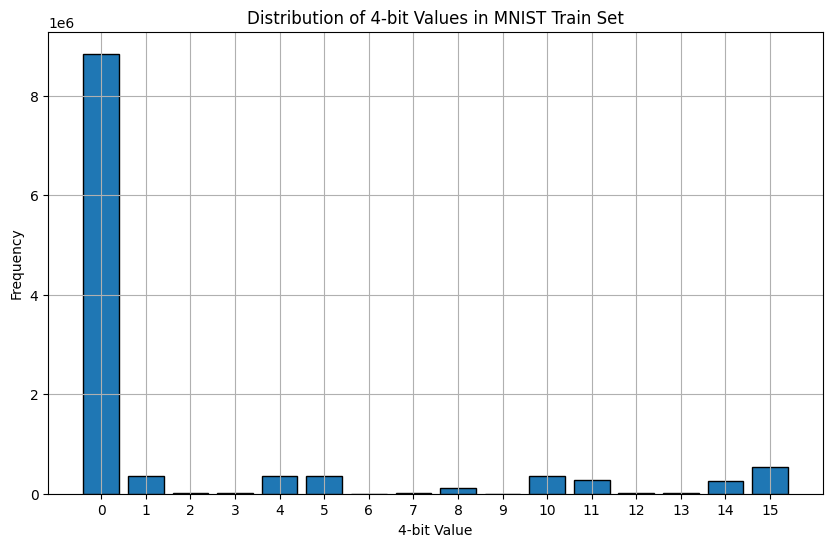

Distribution of 4-bit Values in MNIST Test Set Counts:
0: 1470120
1: 58844
2: 3881
3: 3604
4: 60272
5: 59508
6: 145
7: 1905
8: 16632
9: 154
10: 57749
11: 47236
12: 1427
13: 1485
14: 45148
15: 91890


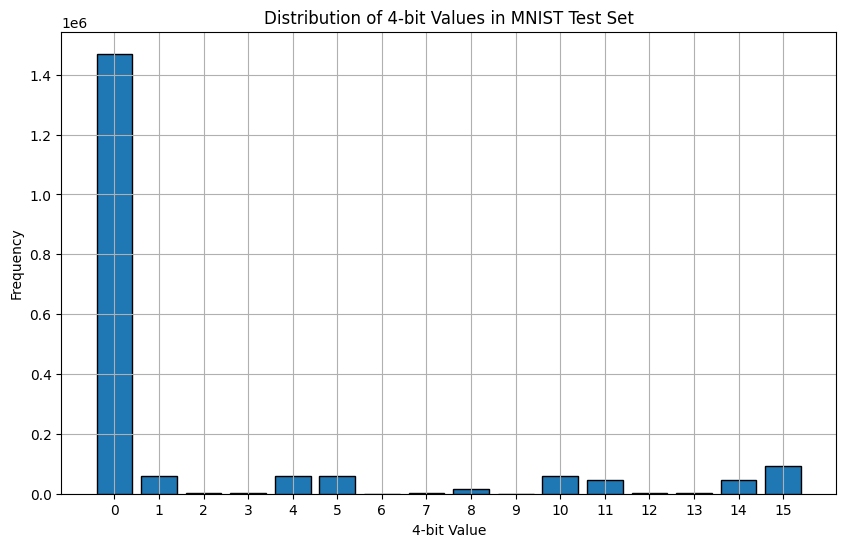

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4bit 조합을 숫자로 매핑하는 딕셔너리
bit_to_num = {
    '0000': 0, '0001': 1, '0010': 2, '0100': 3,
    '1000': 4, '0011': 5, '0101': 6, '1001': 7,
    '0110': 8, '1010': 9, '1100': 10, '0111': 11,
    '1011': 12, '1101': 13, '1110': 14, '1111': 15
}

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=int)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

# Train set 변환
train_processed = [preprocess_image(img) for img in x_train]
train_processed = np.array(train_processed).flatten()

# Test set 변환
test_processed = [preprocess_image(img) for img in x_test]
test_processed = np.array(test_processed).flatten()

# 히스토그램 및 빈도수 출력 함수
def plot_histogram_and_counts(data, title):
    values, counts = np.unique(data, return_counts=True)

    print(f"{title} Counts:")
    for value, count in zip(values, counts):
        print(f"{value}: {count}")

    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=np.arange(17) - 0.5, edgecolor='black', rwidth=0.8)
    plt.xticks(range(16))
    plt.xlabel('4-bit Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Train set 히스토그램 및 빈도수 출력
plot_histogram_and_counts(train_processed, 'Distribution of 4-bit Values in MNIST Train Set')

# Test set 히스토그램 및 빈도수 출력
plot_histogram_and_counts(test_processed, 'Distribution of 4-bit Values in MNIST Test Set')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8409 - loss: 0.5378 - val_accuracy: 0.9459 - val_loss: 0.1805
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9503 - loss: 0.1598 - val_accuracy: 0.9515 - val_loss: 0.1546
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9603 - loss: 0.1226 - val_accuracy: 0.9559 - val_loss: 0.1523
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.0948 - val_accuracy: 0.9591 - val_loss: 0.1348
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9731 - loss: 0.0850 - val_accuracy: 0.9616 - val_loss: 0.1388
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9764 - loss: 0.0719 - val_accuracy: 0.9621 - val_loss: 0.1398
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9804 - loss: 0.0602 - val_accuracy: 0.9614 - val_loss: 0.1496
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━

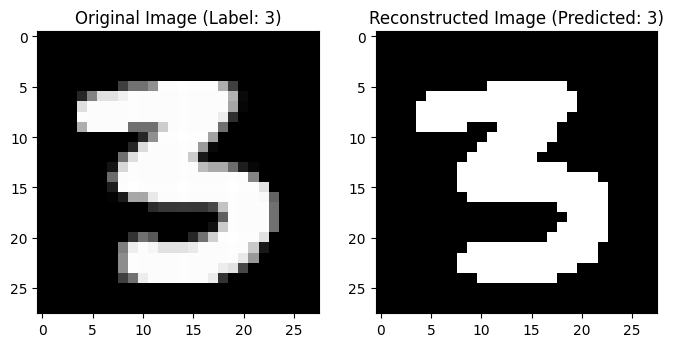

Actual Label: 3
Predicted Label: 3


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4bit 조합을 숫자로 매핑하는 딕셔너리와 역매핑 딕셔너리
bit_to_num = {
    '0000': 0, '0001': 1, '0010': 2, '0100': 3,
    '1000': 4, '0011': 5, '0101': 6, '1001': 7,
    '0110': 8, '1010': 9, '1100': 10, '0111': 11,
    '1011': 12, '1101': 13, '1110': 14, '1111': 15
}
num_to_bit = {v: k for k, v in bit_to_num.items()}

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=int)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def reconstruct_image(data):
    # 1x192 데이터를 28x28 이미지로 변환
    flattened = np.zeros(784)

    for i in range(192):
        bits = num_to_bit[data[i]]
        for j in range(4):
            flattened[i * 4 + j] = int(bits[j])

    # 원래의 28x28 이미지로 변환
    reconstructed = flattened.reshape(28, 28)
    return reconstructed

# Train set 변환
x_train_processed = np.array([preprocess_image(img) for img in x_train])

# Test set 변환
x_test_processed = np.array([preprocess_image(img) for img in x_test])

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(192,)),
    tf.keras.layers.Dense(128, activation='relu'),  # 첫 번째 은닉층
    tf.keras.layers.Dense(64, activation='relu'),   # 두 번째 은닉층
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train_processed, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_processed, y_test_one_hot))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_processed, y_test_one_hot, verbose=2)
print(f'\n테스트 정확도: {test_acc:.4f}')

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_processed[random_idx]
original_image = x_test[random_idx]
reconstructed_image = reconstruct_image(test_image)
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지와 재구성된 이미지를 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {actual_label})')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


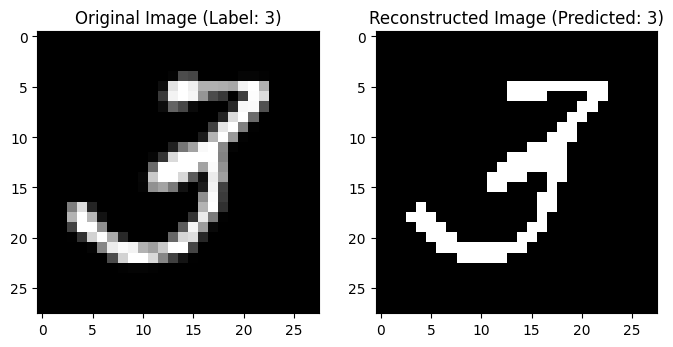

Actual Label: 3
Predicted Label: 3


In [ ]:
# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_processed[random_idx]
original_image = x_test[random_idx]
reconstructed_image = reconstruct_image(test_image)
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지와 재구성된 이미지를 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {actual_label})')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')

4-bit to Random Number Mapping:
0000 -> 10
0001 -> 24
0010 -> 9
0011 -> 16
0100 -> 20
0101 -> 29
0110 -> 35
0111 -> 44
1000 -> 31
1001 -> 28
1010 -> 25
1011 -> 33
1100 -> 20
1101 -> 14
1110 -> 42
1111 -> 40
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7176 - loss: 1.3408 - val_accuracy: 0.8708 - val_loss: 0.4083
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8849 - loss: 0.3687 - val_accuracy: 0.8886 - val_loss: 0.3536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9047 - loss: 0.3040 - val_accuracy: 0.9043 - val_loss: 0.3086
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9168 - loss: 0.2665 - val_accuracy: 0.9102 - val_loss: 0.2849
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9219 - loss: 0.2446 - val_accuracy: 0.9284 - val_loss: 0.2348
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9259 - loss: 0.2286 - val_accuracy: 0.9144 - val_loss: 0.2677
Epoch 7/10
18

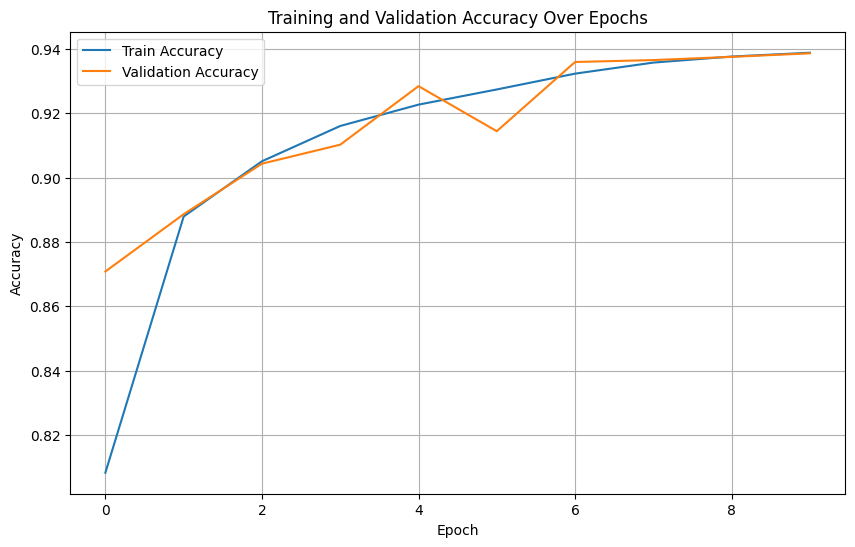

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


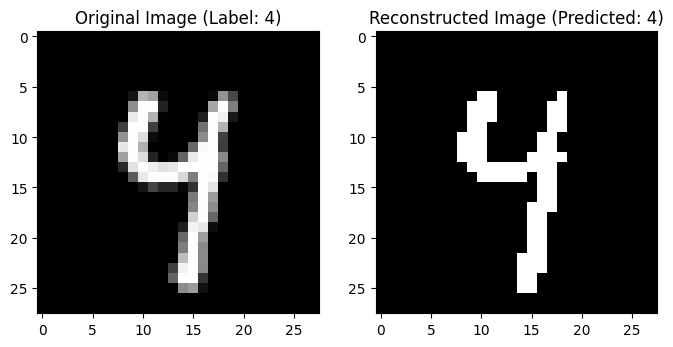

Actual Label: 4
Predicted Label: 4


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 0~1000 사이의 랜덤한 16개의 숫자 생성
random_mapping = np.random.randint(0, 50, 16)
bit_to_num = {f'{i:04b}': random_mapping[i] for i in range(16)}
num_to_bit = {v: k for k, v in bit_to_num.items()}

# 딕셔너리 출력
print("4-bit to Random Number Mapping:")
for bit_pattern, random_value in bit_to_num.items():
    print(f'{bit_pattern} -> {random_value}')

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=int)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def reconstruct_image(data):
    # 1x192 데이터를 28x28 이미지로 변환
    flattened = np.zeros(784)

    for i in range(192):
        bits = num_to_bit[data[i]]
        for j in range(4):
            flattened[i * 4 + j] = int(bits[j])

    # 원래의 28x28 이미지로 변환
    reconstructed = flattened.reshape(28, 28)
    return reconstructed

# Train set 변환
x_train_processed = np.array([preprocess_image(img) for img in x_train])

# Test set 변환
x_test_processed = np.array([preprocess_image(img) for img in x_test])

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(192,)),
    tf.keras.layers.Dense(128, activation='relu'),  # 첫 번째 은닉층
    tf.keras.layers.Dense(64, activation='relu'),   # 두 번째 은닉층
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train_processed, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_processed, y_test_one_hot))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_processed, y_test_one_hot, verbose=2)
print(f'\n테스트 정확도: {test_acc:.4f}')

# 학습 정확도와 검증 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_processed[random_idx]
original_image = x_test[random_idx]
reconstructed_image = reconstruct_image(test_image)
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지와 재구성된 이미지를 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {actual_label})')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')


4-bit to Current Value Mapping:
0000 -> 56
1000 -> 124
0100 -> 180
0010 -> 189
0001 -> 382
1100 -> 398
1010 -> 501
0110 -> 714
1001 -> 751
0101 -> 789
0011 -> 820
1110 -> 885
1101 -> 897
1011 -> 961
0111 -> 995
1111 -> 996
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7048 - loss: 18.7189 - val_accuracy: 0.7514 - val_loss: 0.9547
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8007 - loss: 0.7921 - val_accuracy: 0.8582 - val_loss: 0.5129
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8664 - loss: 0.4966 - val_accuracy: 0.9011 - val_loss: 0.3628
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9039 - loss: 0.3463 - val_accuracy: 0.9261 - val_loss: 0.2615
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.2780 - val_accuracy: 0.9309 - val_loss: 0.2519
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9325 - loss: 0.2390 - val_accuracy: 0.9247 - val_loss: 0.2

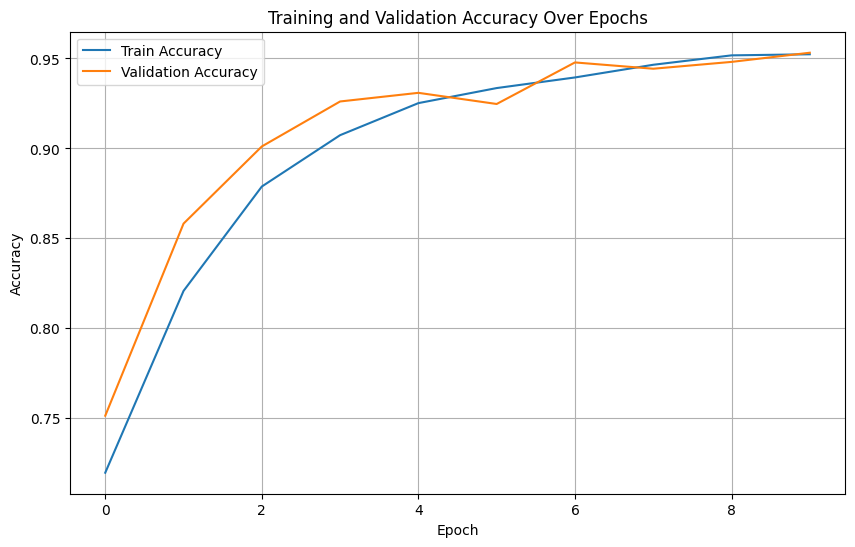

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


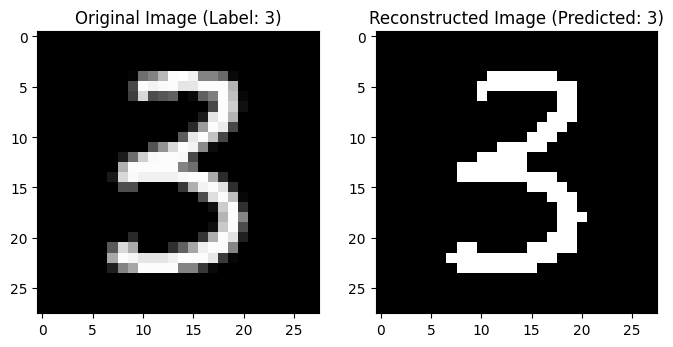

Actual Label: 3
Predicted Label: 3


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4비트 패턴을 정의된 순서로 정렬
bit_patterns = ['0000', '1000', '0100', '0010', '0001',
                '1100', '1010', '0110', '1001', '0101', '0011',
                '1110', '1101', '1011', '0111', '1111']

# 전류 값 생성 (0 ~ 1000 사이의 순서대로 증가하는 랜덤 값)
current_values = sorted(np.random.randint(0, 1001, len(bit_patterns)))

# 4비트 패턴을 전류 값에 매핑
bit_to_num = {bit_patterns[i]: current_values[i] for i in range(len(bit_patterns))}
num_to_bit = {v: k for k, v in bit_to_num.items()}

# 딕셔너리 출력
print("4-bit to Current Value Mapping:")
for bit_pattern, current_value in bit_to_num.items():
    print(f'{bit_pattern} -> {current_value}')

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=int)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def reconstruct_image(data):
    # 1x192 데이터를 28x28 이미지로 변환
    flattened = np.zeros(784)

    for i in range(192):
        bits = num_to_bit[data[i]]
        for j in range(4):
            flattened[i * 4 + j] = int(bits[j])

    # 원래의 28x28 이미지로 변환
    reconstructed = flattened.reshape(28, 28)
    return reconstructed

# Train set 변환
x_train_processed = np.array([preprocess_image(img) for img in x_train])

# Test set 변환
x_test_processed = np.array([preprocess_image(img) for img in x_test])

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(192,)),
    tf.keras.layers.Dense(128, activation='relu'),  # 첫 번째 은닉층
    tf.keras.layers.Dense(64, activation='relu'),   # 두 번째 은닉층
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train_processed, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_processed, y_test_one_hot))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_processed, y_test_one_hot, verbose=2)
print(f'\n테스트 정확도: {test_acc:.4f}')

# 학습 정확도와 검증 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_processed[random_idx]
original_image = x_test[random_idx]
reconstructed_image = reconstruct_image(test_image)
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지와 재구성된 이미지를 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {actual_label})')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')



Iteration 1 - 4-bit to Current Value Mapping:
0000 -> 11
1000 -> 26
0100 -> 32
0010 -> 85
0001 -> 136
1100 -> 160
1010 -> 175
0110 -> 209
1001 -> 338
0101 -> 370
0011 -> 466
1110 -> 546
1101 -> 798
1011 -> 868
0111 -> 901
1111 -> 908

Iteration 1 Test Accuracy: 0.9223


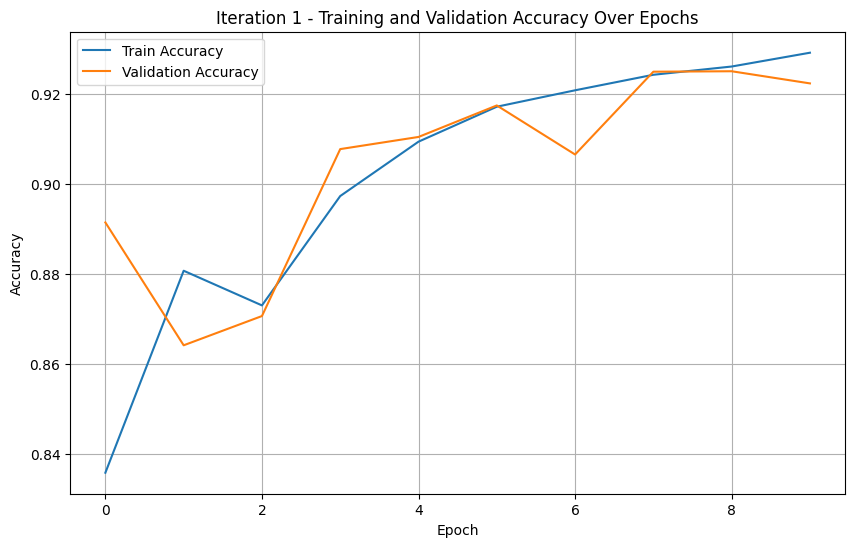

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


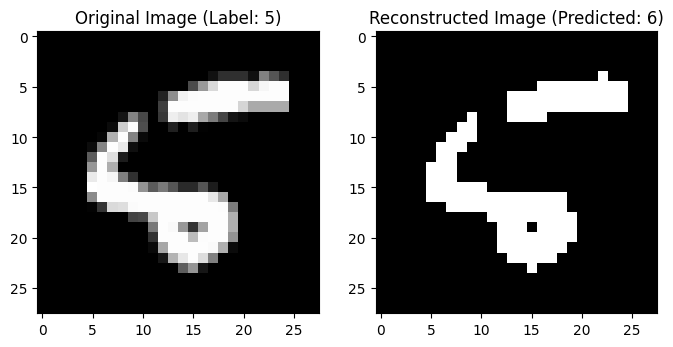

Actual Label: 5
Predicted Label: 6

Iteration 2 - 4-bit to Current Value Mapping:
0000 -> 17
1000 -> 60
0100 -> 70
0010 -> 167
0001 -> 170
1100 -> 378
1010 -> 379
0110 -> 492
1001 -> 516
0101 -> 519
0011 -> 528
1110 -> 582
1101 -> 718
1011 -> 798
0111 -> 912
1111 -> 927

Iteration 2 Test Accuracy: 0.9246


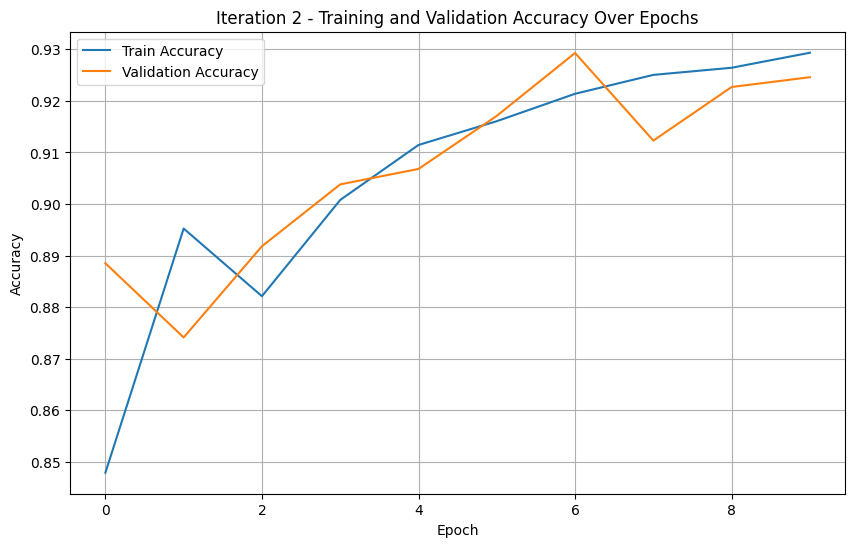

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


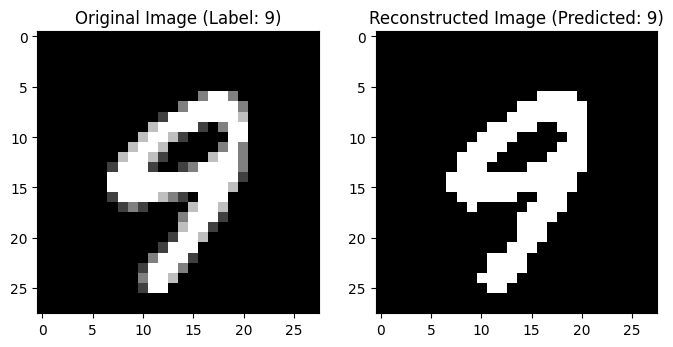

Actual Label: 9
Predicted Label: 9

Iteration 3 - 4-bit to Current Value Mapping:
0000 -> 74
1000 -> 155
0100 -> 205
0010 -> 205
0001 -> 240
1100 -> 438
1010 -> 450
0110 -> 502
1001 -> 516
0101 -> 545
0011 -> 549
1110 -> 576
1101 -> 654
1011 -> 934
0111 -> 952
1111 -> 967

Iteration 3 Test Accuracy: 0.9121


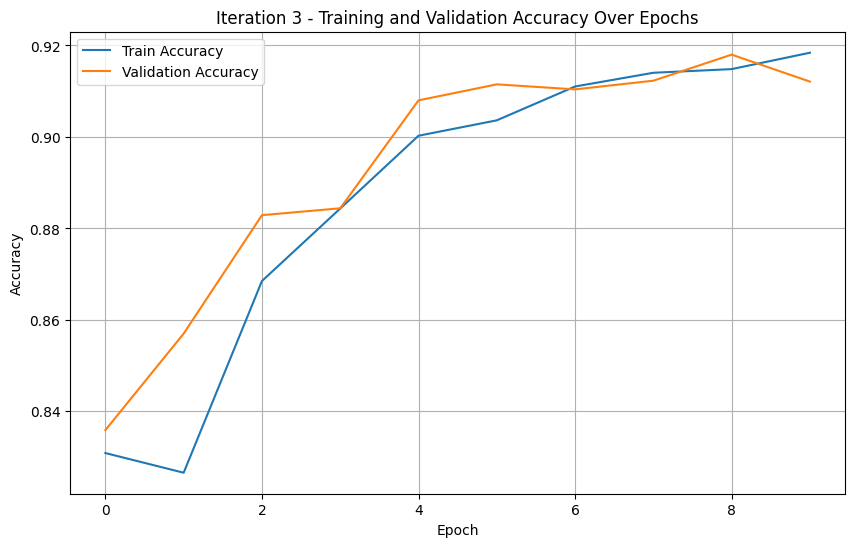

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


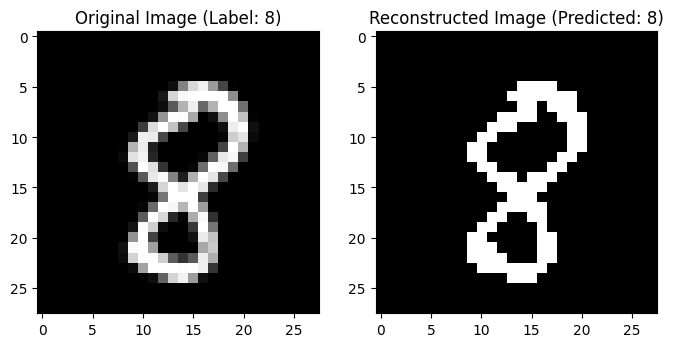

Actual Label: 8
Predicted Label: 8

Iteration 4 - 4-bit to Current Value Mapping:
0000 -> 48
1000 -> 82
0100 -> 156
0010 -> 194
0001 -> 435
1100 -> 448
1010 -> 521
0110 -> 633
1001 -> 666
0101 -> 733
0011 -> 760
1110 -> 778
1101 -> 796
1011 -> 898
0111 -> 909
1111 -> 942

Iteration 4 Test Accuracy: 0.9162


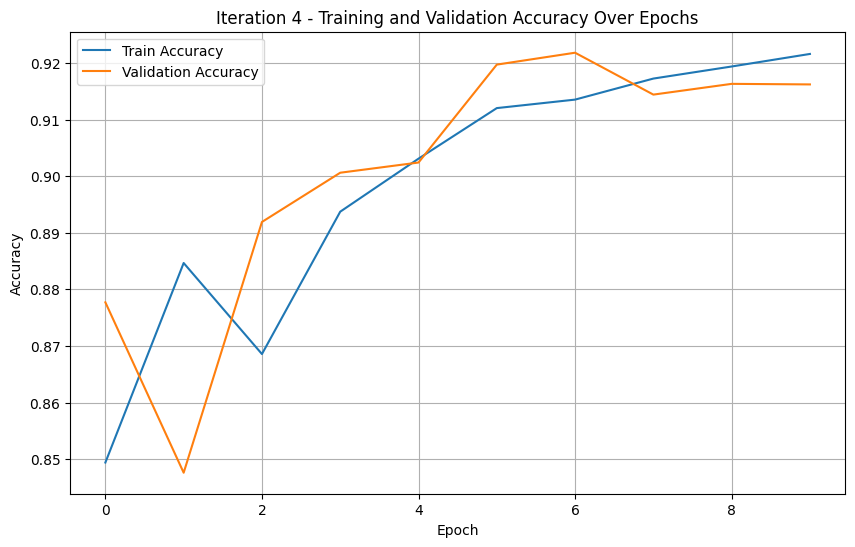

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


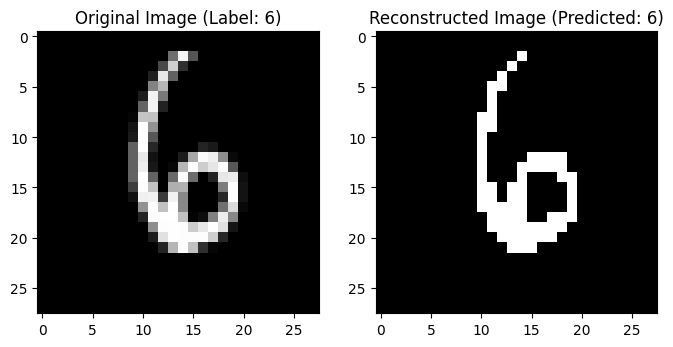

Actual Label: 6
Predicted Label: 6

Iteration 5 - 4-bit to Current Value Mapping:
0000 -> 77
1000 -> 235
0100 -> 237
0010 -> 283
0001 -> 367
1100 -> 396
1010 -> 429
0110 -> 497
1001 -> 546
0101 -> 611
0011 -> 618
1110 -> 671
1101 -> 760
1011 -> 767
0111 -> 857
1111 -> 868

Iteration 5 Test Accuracy: 0.9225


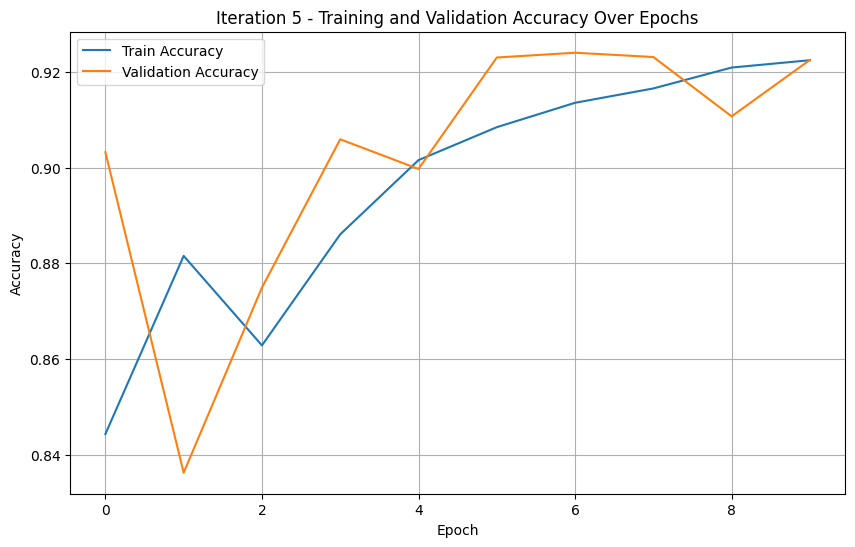

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


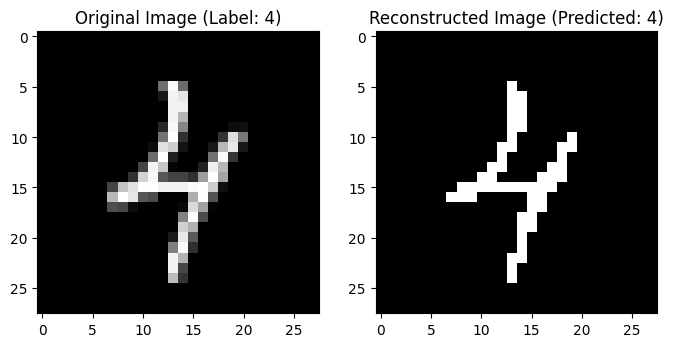

Actual Label: 4
Predicted Label: 4

Iteration 6 - 4-bit to Current Value Mapping:
0000 -> 17
1000 -> 42
0100 -> 46
0010 -> 207
0001 -> 273
1100 -> 299
1010 -> 458
0110 -> 589
1001 -> 675
0101 -> 695
0011 -> 698
1110 -> 711
1101 -> 717
1011 -> 770
0111 -> 890
1111 -> 895

Iteration 6 Test Accuracy: 0.9170


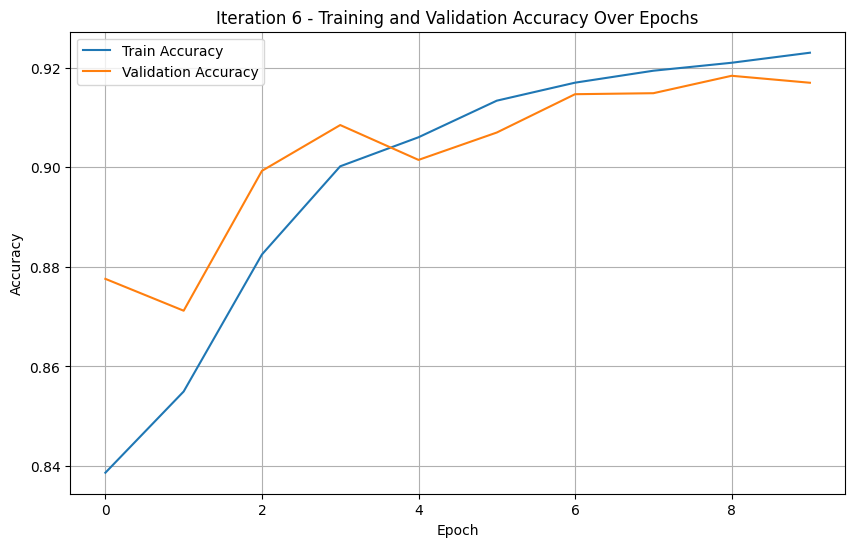

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


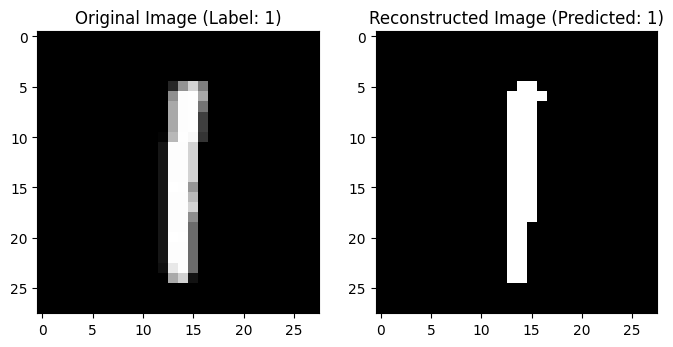

Actual Label: 1
Predicted Label: 1

Iteration 7 - 4-bit to Current Value Mapping:
0000 -> 20
1000 -> 26
0100 -> 46
0010 -> 82
0001 -> 198
1100 -> 264
1010 -> 480
0110 -> 494
1001 -> 519
0101 -> 620
0011 -> 728
1110 -> 755
1101 -> 811
1011 -> 852
0111 -> 906
1111 -> 946

Iteration 7 Test Accuracy: 0.9104


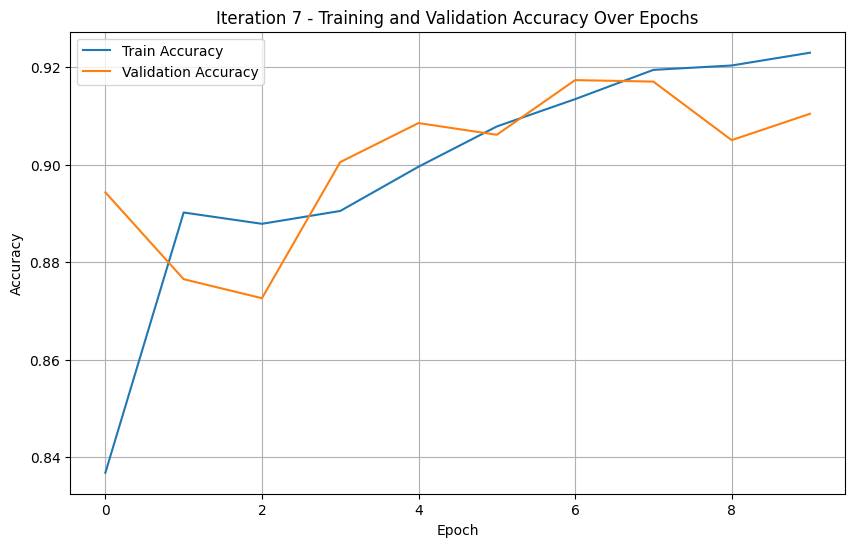

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


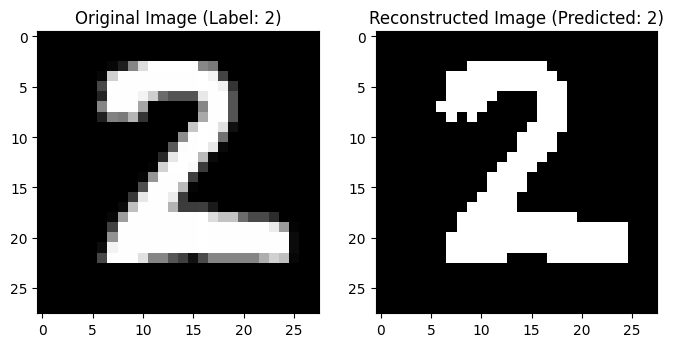

Actual Label: 2
Predicted Label: 2

Iteration 8 - 4-bit to Current Value Mapping:
0000 -> 131
1000 -> 224
0100 -> 231
0010 -> 249
0001 -> 289
1100 -> 349
1010 -> 374
0110 -> 434
1001 -> 493
0101 -> 524
0011 -> 581
1110 -> 688
1101 -> 699
1011 -> 728
0111 -> 747
1111 -> 758

Iteration 8 Test Accuracy: 0.9114


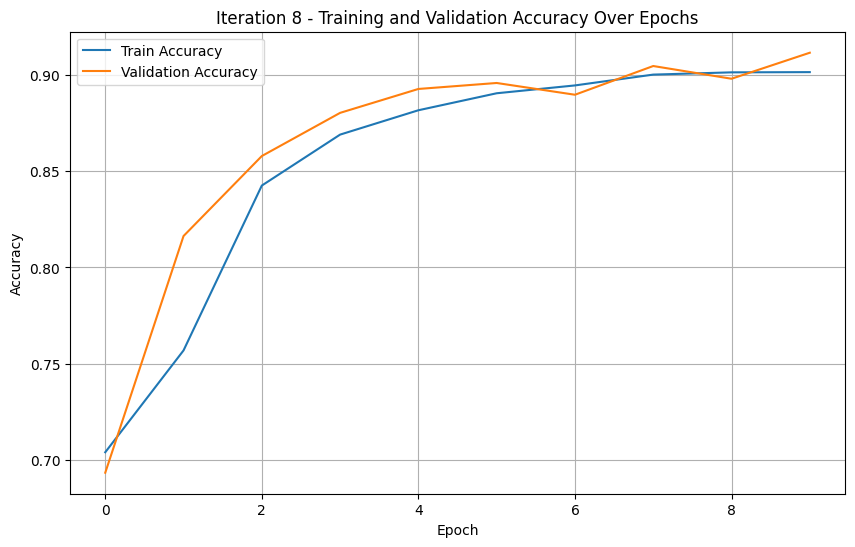

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


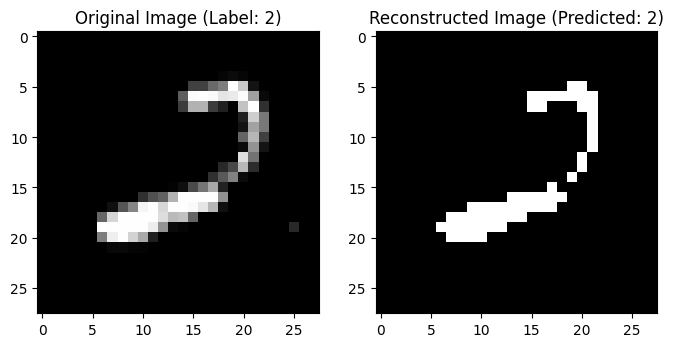

Actual Label: 2
Predicted Label: 2

Iteration 9 - 4-bit to Current Value Mapping:
0000 -> 86
1000 -> 153
0100 -> 281
0010 -> 287
0001 -> 329
1100 -> 485
1010 -> 559
0110 -> 603
1001 -> 714
0101 -> 715
0011 -> 721
1110 -> 797
1101 -> 937
1011 -> 968
0111 -> 974
1111 -> 998

Iteration 9 Test Accuracy: 0.9091


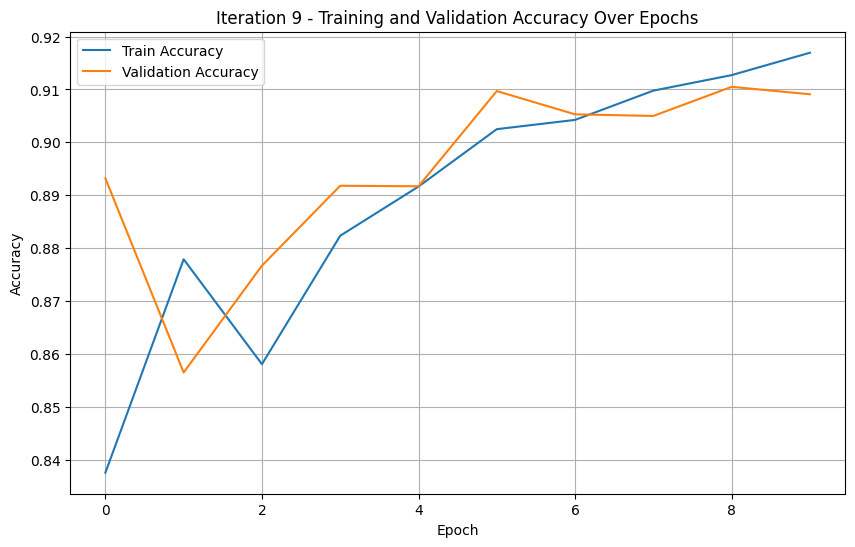

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


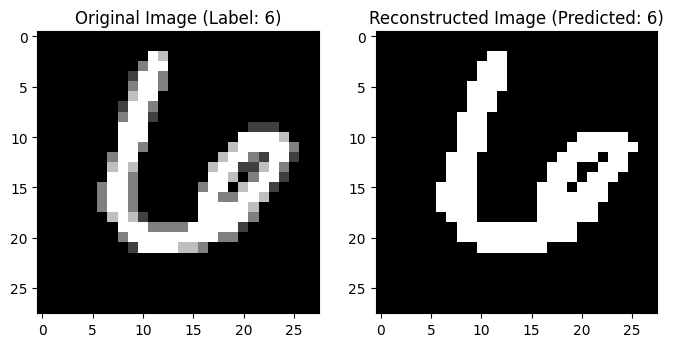

Actual Label: 6
Predicted Label: 6

Iteration 10 - 4-bit to Current Value Mapping:
0000 -> 31
1000 -> 37
0100 -> 82
0010 -> 110
0001 -> 261
1100 -> 301
1010 -> 414
0110 -> 477
1001 -> 572
0101 -> 612
0011 -> 628
1110 -> 634
1101 -> 670
1011 -> 692
0111 -> 706
1111 -> 812

Iteration 10 Test Accuracy: 0.9215


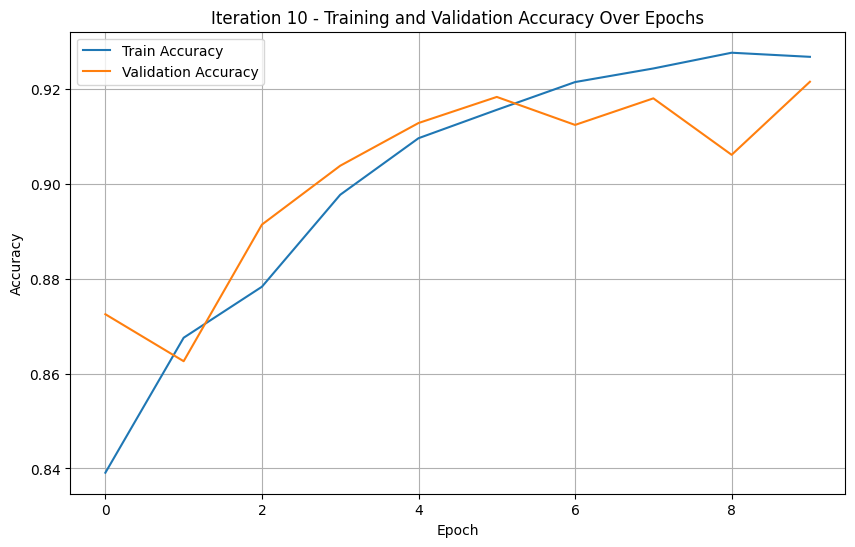

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


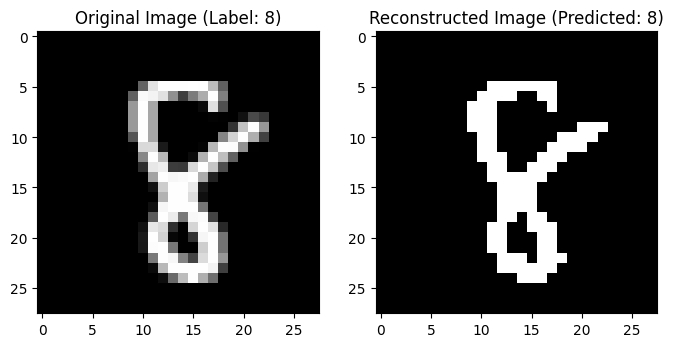

Actual Label: 8
Predicted Label: 8


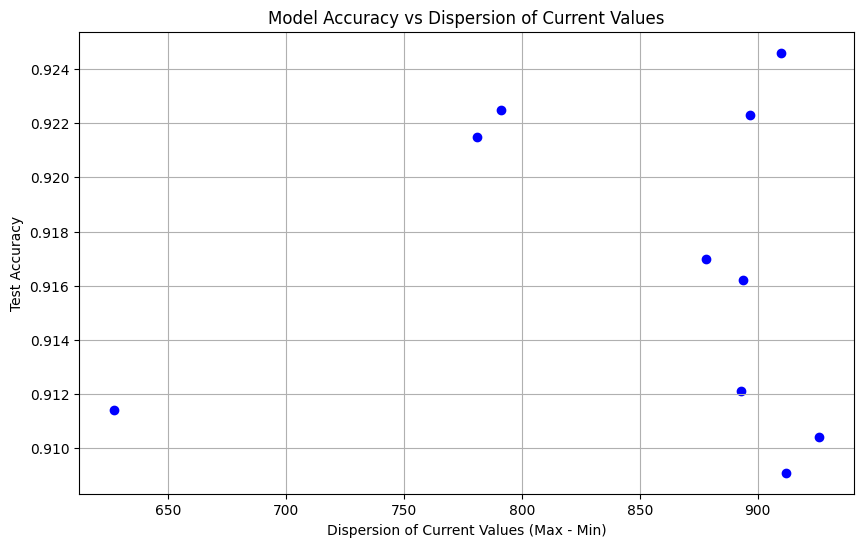


Iteration 1 - 4-bit to Current Value Mapping:
0000 -> 11
1000 -> 26
0100 -> 32
0010 -> 85
0001 -> 136
1100 -> 160
1010 -> 175
0110 -> 209
1001 -> 338
0101 -> 370
0011 -> 466
1110 -> 546
1101 -> 798
1011 -> 868
0111 -> 901
1111 -> 908

Iteration 2 - 4-bit to Current Value Mapping:
0000 -> 17
1000 -> 60
0100 -> 70
0010 -> 167
0001 -> 170
1100 -> 378
1010 -> 379
0110 -> 492
1001 -> 516
0101 -> 519
0011 -> 528
1110 -> 582
1101 -> 718
1011 -> 798
0111 -> 912
1111 -> 927

Iteration 3 - 4-bit to Current Value Mapping:
0000 -> 74
1000 -> 155
0100 -> 205
0010 -> 205
0001 -> 240
1100 -> 438
1010 -> 450
0110 -> 502
1001 -> 516
0101 -> 545
0011 -> 549
1110 -> 576
1101 -> 654
1011 -> 934
0111 -> 952
1111 -> 967

Iteration 4 - 4-bit to Current Value Mapping:
0000 -> 48
1000 -> 82
0100 -> 156
0010 -> 194
0001 -> 435
1100 -> 448
1010 -> 521
0110 -> 633
1001 -> 666
0101 -> 733
0011 -> 760
1110 -> 778
1101 -> 796
1011 -> 898
0111 -> 909
1111 -> 942

Iteration 5 - 4-bit to Current Value Mapping:
0000 ->

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4비트 패턴을 정의된 순서로 정렬
bit_patterns = ['0000', '1000', '0100', '0010', '0001',
                '1100', '1010', '0110', '1001', '0101', '0011',
                '1110', '1101', '1011', '0111', '1111']

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=int)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def reconstruct_image(data):
    # 1x192 데이터를 28x28 이미지로 변환
    flattened = np.zeros(784)

    for i in range(192):
        bits = num_to_bit[data[i]]
        for j in range(4):
            flattened[i * 4 + j] = int(bits[j])

    # 원래의 28x28 이미지로 변환
    reconstructed = flattened.reshape(28, 28)
    return reconstructed

# 결과를 저장할 리스트
model_accuracies = []
dispersion_values = []
all_bit_to_num = []

# 10번의 학습 반복
for iteration in range(10):
    # 전류 값 생성 (0 ~ 1000 사이의 순서대로 증가하는 랜덤 값)
    current_values = sorted(np.random.randint(0, 1001, len(bit_patterns)))

    # 4비트 패턴을 전류 값에 매핑
    bit_to_num = {bit_patterns[i]: current_values[i] for i in range(len(bit_patterns))}
    num_to_bit = {v: k for k, v in bit_to_num.items()}

    # 딕셔너리 출력
    print(f"\nIteration {iteration+1} - 4-bit to Current Value Mapping:")
    for bit_pattern, current_value in bit_to_num.items():
        print(f'{bit_pattern} -> {current_value}')

    # 딕셔너리 저장
    all_bit_to_num.append(bit_to_num)

    # Train set 변환
    x_train_processed = np.array([preprocess_image(img) for img in x_train])

    # Test set 변환
    x_test_processed = np.array([preprocess_image(img) for img in x_test])

    # 라벨을 원-핫 인코딩
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

    # 모델 정의 (은닉층 1개)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(192,)),
        tf.keras.layers.Dense(128, activation='relu'),  # 은닉층
        tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
    ])

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 모델 학습
    history = model.fit(x_train_processed, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_processed, y_test_one_hot), verbose=0)

    # 모델 평가
    test_loss, test_acc = model.evaluate(x_test_processed, y_test_one_hot, verbose=0)
    print(f'\nIteration {iteration+1} Test Accuracy: {test_acc:.4f}')

    # 산포도 계산 (최대값 - 최소값)
    dispersion = np.ptp(current_values)  # ptp는 최대값과 최소값의 차이를 계산합니다.

    # 결과 저장
    model_accuracies.append(test_acc)
    dispersion_values.append(dispersion)

    # 학습 정확도와 검증 정확도 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Iteration {iteration+1} - Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 랜덤하게 하나의 테스트 데이터 선택
    random_idx = random.randint(0, len(x_test) - 1)
    test_image = x_test_processed[random_idx]
    original_image = x_test[random_idx]
    reconstructed_image = reconstruct_image(test_image)
    actual_label = y_test[random_idx]
    predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

    # 원래 이미지와 재구성된 이미지를 출력
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Original Image (Label: {actual_label})')
    plt.imshow(original_image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
    plt.imshow(reconstructed_image, cmap='gray')
    plt.show()

    # 실제 라벨과 예측된 라벨 출력
    print(f'Actual Label: {actual_label}')
    print(f'Predicted Label: {predicted_label}')

# 모델 정확도와 산포도 시각화
plt.figure(figsize=(10, 6))
plt.scatter(dispersion_values, model_accuracies, color='blue')
plt.xlabel('Dispersion of Current Values (Max - Min)')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy vs Dispersion of Current Values')
plt.grid(True)
plt.show()

# 모든 딕셔너리 출력
for i, bit_to_num in enumerate(all_bit_to_num):
    print(f"\nIteration {i+1} - 4-bit to Current Value Mapping:")
    for bit_pattern, current_value in bit_to_num.items():
        print(f'{bit_pattern} -> {current_value}')


Test Accuracy: 0.9333


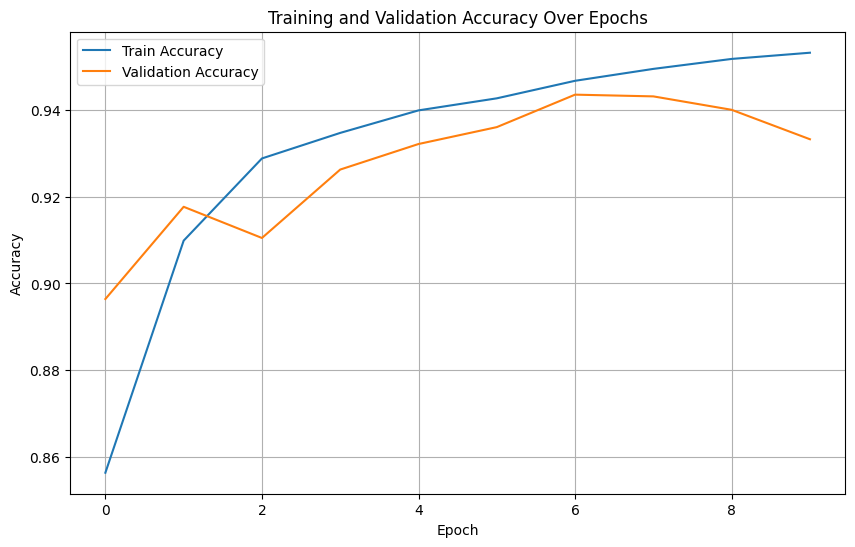

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


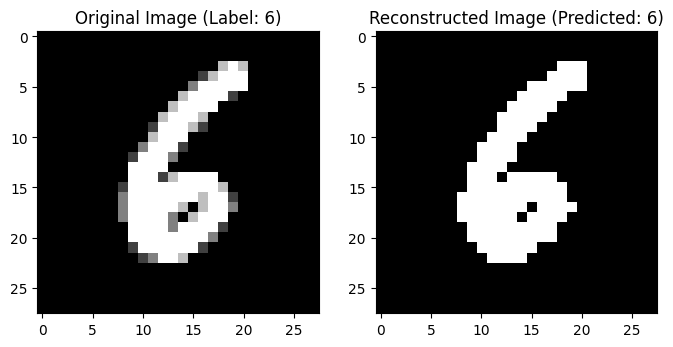

Actual Label: 6
Predicted Label: 6


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4비트 패턴을 정의된 순서로 고정
bit_patterns = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111',
                '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']

current_values = [1.6798, 92.576, 86.1319, 96.6327, 81.1008, 100.066, 91.949, 101.082,
                  78.113, 98.6407, 92.6099, 102.034, 88.0777, 102.251, 95.9554, 104.412]

# 4비트 패턴을 전류 값에 매핑
bit_to_num = {bit_patterns[i]: current_values[i] for i in range(len(bit_patterns))}
num_to_bit = {v: k for k, v in bit_to_num.items()}

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=float)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def reconstruct_image(data):
    # 1x192 데이터를 28x28 이미지로 변환
    flattened = np.zeros(784)

    for i in range(192):
        current_value = data[i]
        # 가장 가까운 current_value를 찾음
        closest_value = min(num_to_bit.keys(), key=lambda x: abs(x - current_value))
        bits = num_to_bit[closest_value]
        for j in range(4):
            flattened[i * 4 + j] = int(bits[j])

    # 원래의 28x28 이미지로 변환
    reconstructed = flattened.reshape(28, 28)
    return reconstructed

# Train set 변환
x_train_processed = np.array([preprocess_image(img) for img in x_train])

# Test set 변환
x_test_processed = np.array([preprocess_image(img) for img in x_test])

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# 모델 정의 (은닉층 1개)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(192,)),
    tf.keras.layers.Dense(128, activation='relu'),  # 은닉층
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train_processed, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_processed, y_test_one_hot), verbose=0)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_processed, y_test_one_hot, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

# 학습 정확도와 검증 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_processed[random_idx]
original_image = x_test[random_idx]
reconstructed_image = reconstruct_image(test_image)
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지와 재구성된 이미지를 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {actual_label})')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')


은닉층 없는 RC 버전

Epoch 1: Train Accuracy = 0.7704, Validation Accuracy = 0.8568
Epoch 2: Train Accuracy = 0.8536, Validation Accuracy = 0.8699
Epoch 3: Train Accuracy = 0.8576, Validation Accuracy = 0.8461
Epoch 4: Train Accuracy = 0.8567, Validation Accuracy = 0.8566
Epoch 5: Train Accuracy = 0.8555, Validation Accuracy = 0.8509
Epoch 6: Train Accuracy = 0.8561, Validation Accuracy = 0.8012
Epoch 7: Train Accuracy = 0.8536, Validation Accuracy = 0.8417
Epoch 8: Train Accuracy = 0.8545, Validation Accuracy = 0.8731
Epoch 9: Train Accuracy = 0.8548, Validation Accuracy = 0.8514
Epoch 10: Train Accuracy = 0.8554, Validation Accuracy = 0.8607
Test Accuracy: 0.8607


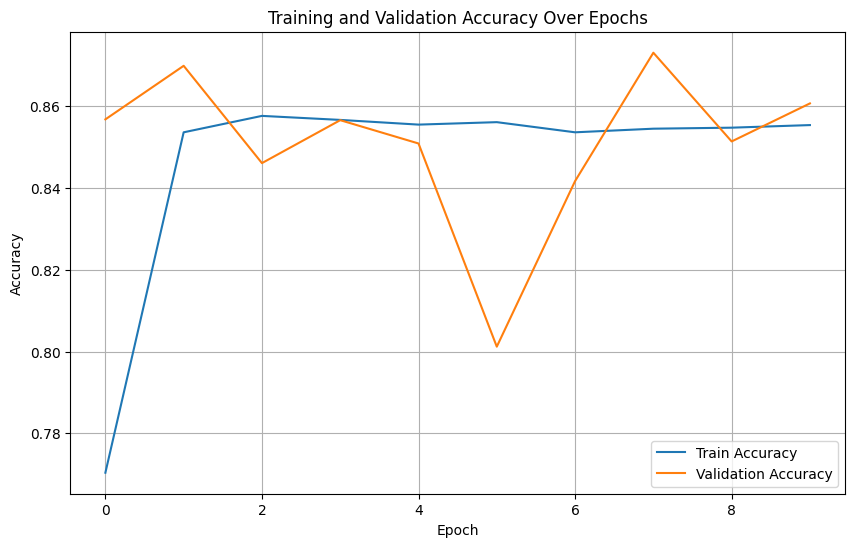

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


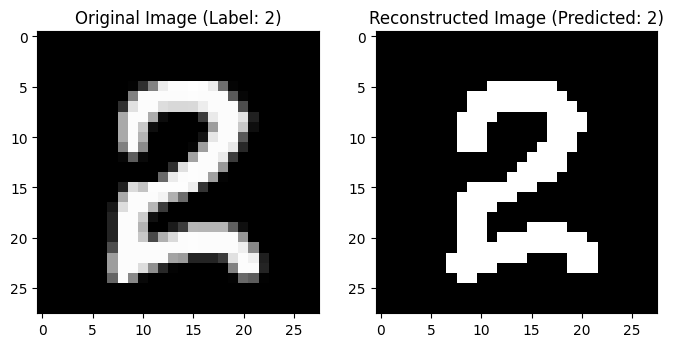

Actual Label: 2
Predicted Label: 2


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4비트 패턴을 정의된 순서로 고정
bit_patterns = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111',
                '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']

current_values = [1.6798, 92.576, 86.1319, 96.6327, 81.1008, 100.066, 91.949, 101.082,
                  78.113, 98.6407, 92.6099, 102.034, 88.0777, 102.251, 95.9554, 104.412]

# 4비트 패턴을 전류 값에 매핑
bit_to_num = {bit_patterns[i]: current_values[i] for i in range(len(bit_patterns))}
num_to_bit = {v: k for k, v in bit_to_num.items()}

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=float)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def reconstruct_image(data):
    # 1x192 데이터를 28x28 이미지로 변환
    flattened = np.zeros(784)

    for i in range(192):
        current_value = data[i]
        # 가장 가까운 current_value를 찾음
        closest_value = min(num_to_bit.keys(), key=lambda x: abs(x - current_value))
        bits = num_to_bit[closest_value]
        for j in range(4):
            flattened[i * 4 + j] = int(bits[j])

    # 원래의 28x28 이미지로 변환
    reconstructed = flattened.reshape(28, 28)
    return reconstructed

# Train set 변환
x_train_processed = np.array([preprocess_image(img) for img in x_train])

# Test set 변환
x_test_processed = np.array([preprocess_image(img) for img in x_test])

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Callback 함수 정의 (에포크별 정확도 출력)
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")

# 모델 정의 (은닉층 없음, 입력에서 바로 출력으로)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(192,)),
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train_processed, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_processed, y_test_one_hot), verbose=0, callbacks=[AccuracyCallback()])

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_processed, y_test_one_hot, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

# 학습 정확도와 검증 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_processed[random_idx]
original_image = x_test[random_idx]
reconstructed_image = reconstruct_image(test_image)
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지와 재구성된 이미지를 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {actual_label})')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')


RC 산포없는 딕셔너리 테스트

Epoch 1: Train Accuracy = 0.7980, Validation Accuracy = 0.8825
Epoch 2: Train Accuracy = 0.8842, Validation Accuracy = 0.8987
Epoch 3: Train Accuracy = 0.8908, Validation Accuracy = 0.8967
Epoch 4: Train Accuracy = 0.8933, Validation Accuracy = 0.8975
Epoch 5: Train Accuracy = 0.8944, Validation Accuracy = 0.8993
Epoch 6: Train Accuracy = 0.8942, Validation Accuracy = 0.8990
Epoch 7: Train Accuracy = 0.8956, Validation Accuracy = 0.8949
Epoch 8: Train Accuracy = 0.8945, Validation Accuracy = 0.8948
Epoch 9: Train Accuracy = 0.8956, Validation Accuracy = 0.8991
Epoch 10: Train Accuracy = 0.8956, Validation Accuracy = 0.8891
Test Accuracy: 0.8891


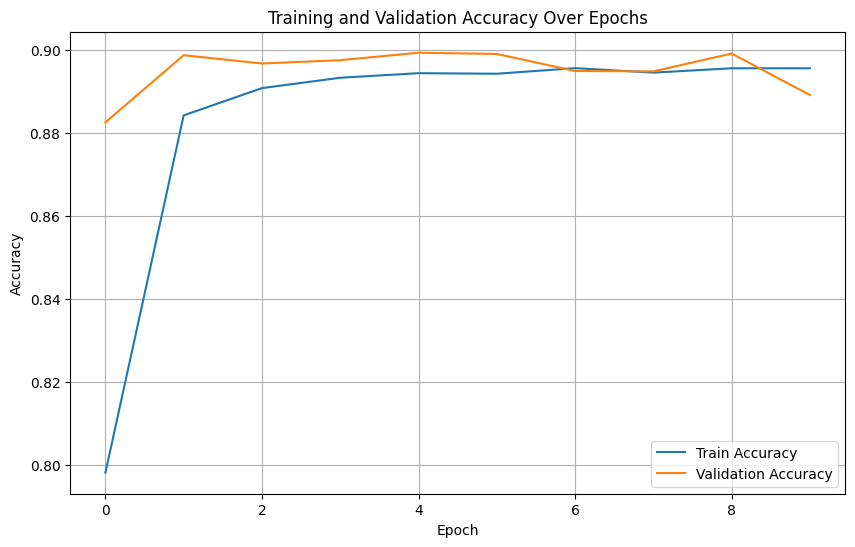

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


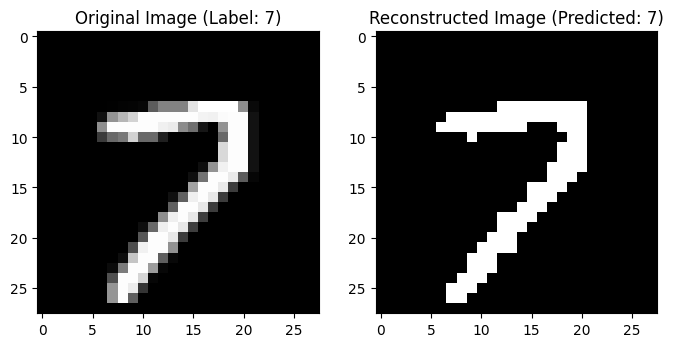

Actual Label: 7
Predicted Label: 7


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4비트 패턴을 정의된 순서로 고정
bit_patterns = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111',
                '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']

current_values = [0, 4, 3, 10, 2, 9, 8, 14,
                  1, 7, 6, 13, 5, 12, 11, 15]

# 4비트 패턴을 전류 값에 매핑
bit_to_num = {bit_patterns[i]: current_values[i] for i in range(len(bit_patterns))}
num_to_bit = {v: k for k, v in bit_to_num.items()}

def preprocess_image(image):
    # 28x28 이미지를 1x192로 변환
    flattened = image.flatten()  # 28x28 -> 784
    reshaped = np.zeros(192, dtype=float)

    for i in range(192):
        bits = ''.join(['1' if flattened[i * 4 + j] >= 0.5 else '0' for j in range(4)])
        reshaped[i] = bit_to_num[bits]

    return reshaped

def reconstruct_image(data):
    # 1x192 데이터를 28x28 이미지로 변환
    flattened = np.zeros(784)

    for i in range(192):
        current_value = data[i]
        # 가장 가까운 current_value를 찾음
        closest_value = min(num_to_bit.keys(), key=lambda x: abs(x - current_value))
        bits = num_to_bit[closest_value]
        for j in range(4):
            flattened[i * 4 + j] = int(bits[j])

    # 원래의 28x28 이미지로 변환
    reconstructed = flattened.reshape(28, 28)
    return reconstructed

# Train set 변환
x_train_processed = np.array([preprocess_image(img) for img in x_train])

# Test set 변환
x_test_processed = np.array([preprocess_image(img) for img in x_test])

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Callback 함수 정의 (에포크별 정확도 출력)
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")

# 모델 정의 (은닉층 없음, 입력에서 바로 출력으로)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(192,)),
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train_processed, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_processed, y_test_one_hot), verbose=0, callbacks=[AccuracyCallback()])

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_processed, y_test_one_hot, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

# 학습 정확도와 검증 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_processed[random_idx]
original_image = x_test[random_idx]
reconstructed_image = reconstruct_image(test_image)
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지와 재구성된 이미지를 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Label: {actual_label})')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (Predicted: {predicted_label})')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')


MNIST ANN 레퍼런스(은닉층 없는 786 -> 10 레이어)

*   항목 추가
*   항목 추가



Epoch 1: Train Accuracy = 0.8779, Validation Accuracy = 0.9155
Epoch 2: Train Accuracy = 0.9157, Validation Accuracy = 0.9187
Epoch 3: Train Accuracy = 0.9205, Validation Accuracy = 0.9231
Epoch 4: Train Accuracy = 0.9237, Validation Accuracy = 0.9234
Epoch 5: Train Accuracy = 0.9255, Validation Accuracy = 0.9244
Epoch 6: Train Accuracy = 0.9276, Validation Accuracy = 0.9255
Epoch 7: Train Accuracy = 0.9279, Validation Accuracy = 0.9260
Epoch 8: Train Accuracy = 0.9293, Validation Accuracy = 0.9246
Epoch 9: Train Accuracy = 0.9297, Validation Accuracy = 0.9282
Epoch 10: Train Accuracy = 0.9301, Validation Accuracy = 0.9274
Test Accuracy: 0.9274


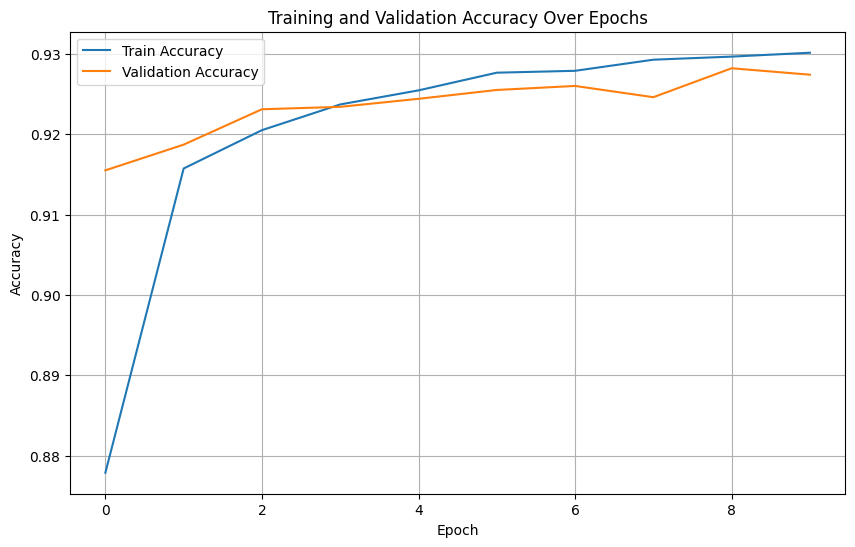

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


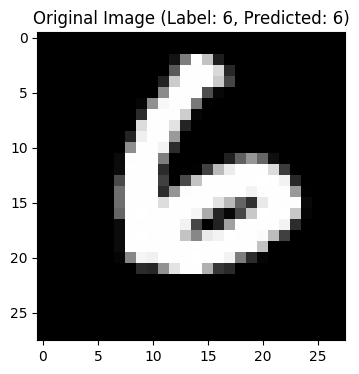

Actual Label: 6
Predicted Label: 6


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 28x28 이미지를 1차원 벡터로 변환
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Callback 함수 정의 (에포크별 정확도 출력)
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")

# 모델 정의 (은닉층 없음, 입력에서 바로 출력으로)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28 * 28,)),
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train_flat, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test_flat, y_test_one_hot), verbose=0, callbacks=[AccuracyCallback()])

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_flat, y_test_one_hot, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

# 학습 정확도와 검증 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_flat[random_idx]
original_image = x_test[random_idx]
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지를 출력
plt.figure(figsize=(4, 4))
plt.title(f'Original Image (Label: {actual_label}, Predicted: {predicted_label})')
plt.imshow(original_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')


최고 성능?

Epoch 1: Train Accuracy = 0.9151, Validation Accuracy = 0.9554
Epoch 2: Train Accuracy = 0.9569, Validation Accuracy = 0.9694
Epoch 3: Train Accuracy = 0.9671, Validation Accuracy = 0.9746
Epoch 4: Train Accuracy = 0.9728, Validation Accuracy = 0.9770
Epoch 5: Train Accuracy = 0.9764, Validation Accuracy = 0.9776
Epoch 6: Train Accuracy = 0.9790, Validation Accuracy = 0.9777
Epoch 7: Train Accuracy = 0.9818, Validation Accuracy = 0.9797
Epoch 8: Train Accuracy = 0.9822, Validation Accuracy = 0.9789
Epoch 9: Train Accuracy = 0.9849, Validation Accuracy = 0.9793
Epoch 10: Train Accuracy = 0.9854, Validation Accuracy = 0.9804
Epoch 11: Train Accuracy = 0.9863, Validation Accuracy = 0.9799
Epoch 12: Train Accuracy = 0.9865, Validation Accuracy = 0.9790
Epoch 13: Train Accuracy = 0.9886, Validation Accuracy = 0.9816
Epoch 14: Train Accuracy = 0.9881, Validation Accuracy = 0.9805
Epoch 15: Train Accuracy = 0.9894, Validation Accuracy = 0.9799
Epoch 16: Train Accuracy = 0.9899, Validation Acc

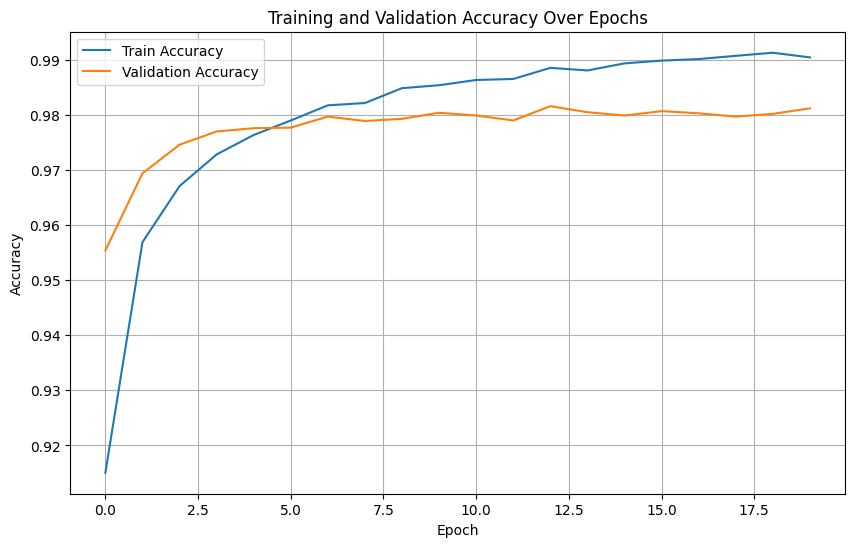

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


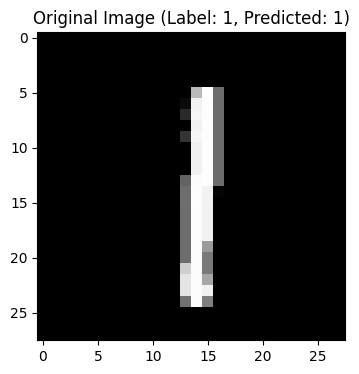

Actual Label: 1
Predicted Label: 1


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# MNIST 데이터셋 다운로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 28x28 이미지를 1차원 벡터로 변환
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# 라벨을 원-핫 인코딩
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Callback 함수 정의 (에포크별 정확도 출력)
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")

# 모델 정의 (은닉층 추가 및 Dropout 적용)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28 * 28,)),
    tf.keras.layers.Dense(128, activation='relu'),  # 은닉층 추가 (128개의 뉴런)
    tf.keras.layers.Dropout(0.2),                   # 드롭아웃 추가 (20% 비율로)
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일 (학습률을 조정한 Adam 옵티마이저 사용)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습 (에포크 수 증가)
history = model.fit(x_train_flat, y_train_one_hot, epochs=20, batch_size=32, validation_data=(x_test_flat, y_test_one_hot), verbose=0, callbacks=[AccuracyCallback()])

# 모델 평가
test_loss, test_acc = model.evaluate(x_test_flat, y_test_one_hot, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

# 학습 정확도와 검증 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 랜덤하게 하나의 테스트 데이터 선택
random_idx = random.randint(0, len(x_test) - 1)
test_image = x_test_flat[random_idx]
original_image = x_test[random_idx]
actual_label = y_test[random_idx]
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# 원래 이미지를 출력
plt.figure(figsize=(4, 4))
plt.title(f'Original Image (Label: {actual_label}, Predicted: {predicted_label})')
plt.imshow(original_image, cmap='gray')
plt.show()

# 실제 라벨과 예측된 라벨 출력
print(f'Actual Label: {actual_label}')
print(f'Predicted Label: {predicted_label}')
